<a href="https://colab.research.google.com/github/grjadhav409/ATG4B-inhibitors-prediction-using-ML/blob/main/2_3_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library, data import

In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
!pip install lime
from lime import lime_tabular

In [ ]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [ ]:
#load data
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/feature_selected.csv")
df = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df

,54,54.1,54.2,54.3,138,138.1,138.2,138.3,168,168.1,...,22.3,45,45.1,45.2,45.3,134,134.1,134.2,134.3,pIC50
0,0.0,0,199.774691,0.000000,0.0,1,4.749373,3.0,0.0,19.128440,...,-2.250958,0.0,0,240.0,5.106527,0.0,0,8.371717,1.0,4.876148
1,0.0,0,146.939815,0.000000,0.0,0,9.340040,1.0,0.0,42.320755,...,-2.175070,0.0,0,175.0,5.733667,1.0,1,17.338578,0.0,5.048662
2,0.0,0,109.575103,12.628789,0.0,1,2.654147,1.0,0.0,17.680851,...,-2.173585,0.0,0,127.0,5.316789,0.0,1,7.156137,0.0,4.735182
3,0.0,0,131.432099,0.000000,0.0,0,2.745318,1.0,0.0,27.575758,...,-2.289170,0.0,0,156.0,5.106527,0.0,0,7.372222,1.0,4.767004
4,0.0,0,149.055556,0.000000,0.0,1,2.476510,2.0,0.0,12.341880,...,-2.450226,0.0,0,218.0,10.216698,0.0,0,5.518519,1.0,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1,171.388889,0.000000,0.0,1,4.074766,0.0,0.0,17.313725,...,-2.498266,0.0,0,181.0,15.370440,0.0,1,8.750000,3.0,4.464706
370,0.0,0,178.374486,0.000000,0.0,0,6.637626,4.0,0.0,27.265625,...,-2.164130,0.0,0,197.0,19.637997,0.0,1,11.743092,1.0,4.677781
371,1.0,0,247.666667,0.000000,0.0,0,10.704545,0.0,0.0,20.841026,...,-2.102140,0.0,0,341.0,30.639164,0.0,0,11.925926,0.0,4.244125
372,0.0,0,177.111111,5.098682,0.0,0,4.928571,3.0,0.0,18.417582,...,-2.157777,0.0,0,193.0,20.524182,0.0,0,8.458333,1.0,4.701147


## Data Analysis


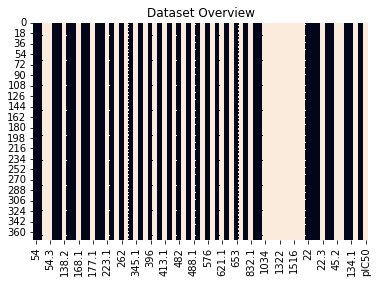

 Categerocial   Numeric   NaN 


In [ ]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [ ]:
df.isnull().sum().sum()


0

In [ ]:
df['Id'] = range(1, len(df) + 1)
df

,54,54.1,54.2,54.3,138,138.1,138.2,138.3,168,168.1,...,45.1,45.2,45.3,134,134.1,134.2,134.3,pIC50,new_col,Id
0,0.0,0,199.774691,0.000000,0.0,1,4.749373,3.0,0.0,19.128440,...,0,240.0,5.106527,0.0,0,8.371717,1.0,4.876148,1,1
1,0.0,0,146.939815,0.000000,0.0,0,9.340040,1.0,0.0,42.320755,...,0,175.0,5.733667,1.0,1,17.338578,0.0,5.048662,2,2
2,0.0,0,109.575103,12.628789,0.0,1,2.654147,1.0,0.0,17.680851,...,0,127.0,5.316789,0.0,1,7.156137,0.0,4.735182,3,3
3,0.0,0,131.432099,0.000000,0.0,0,2.745318,1.0,0.0,27.575758,...,0,156.0,5.106527,0.0,0,7.372222,1.0,4.767004,4,4
4,0.0,0,149.055556,0.000000,0.0,1,2.476510,2.0,0.0,12.341880,...,0,218.0,10.216698,0.0,0,5.518519,1.0,4.928118,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1,171.388889,0.000000,0.0,1,4.074766,0.0,0.0,17.313725,...,0,181.0,15.370440,0.0,1,8.750000,3.0,4.464706,370,370
370,0.0,0,178.374486,0.000000,0.0,0,6.637626,4.0,0.0,27.265625,...,0,197.0,19.637997,0.0,1,11.743092,1.0,4.677781,371,371
371,1.0,0,247.666667,0.000000,0.0,0,10.704545,0.0,0.0,20.841026,...,0,341.0,30.639164,0.0,0,11.925926,0.0,4.244125,372,372
372,0.0,0,177.111111,5.098682,0.0,0,4.928571,3.0,0.0,18.417582,...,0,193.0,20.524182,0.0,0,8.458333,1.0,4.701147,373,373


In [ ]:
dtf = df.set_index("Id")
dtf = df.rename(columns={"pIC50":"Y"})
dtf = dtf.drop(["new_col"],axis=1)
dtf = dtf.drop(["Id"],axis=1)
dtf

,54,54.1,54.2,54.3,138,138.1,138.2,138.3,168,168.1,...,22.3,45,45.1,45.2,45.3,134,134.1,134.2,134.3,Y
0,0.0,0,199.774691,0.000000,0.0,1,4.749373,3.0,0.0,19.128440,...,-2.250958,0.0,0,240.0,5.106527,0.0,0,8.371717,1.0,4.876148
1,0.0,0,146.939815,0.000000,0.0,0,9.340040,1.0,0.0,42.320755,...,-2.175070,0.0,0,175.0,5.733667,1.0,1,17.338578,0.0,5.048662
2,0.0,0,109.575103,12.628789,0.0,1,2.654147,1.0,0.0,17.680851,...,-2.173585,0.0,0,127.0,5.316789,0.0,1,7.156137,0.0,4.735182
3,0.0,0,131.432099,0.000000,0.0,0,2.745318,1.0,0.0,27.575758,...,-2.289170,0.0,0,156.0,5.106527,0.0,0,7.372222,1.0,4.767004
4,0.0,0,149.055556,0.000000,0.0,1,2.476510,2.0,0.0,12.341880,...,-2.450226,0.0,0,218.0,10.216698,0.0,0,5.518519,1.0,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,1,171.388889,0.000000,0.0,1,4.074766,0.0,0.0,17.313725,...,-2.498266,0.0,0,181.0,15.370440,0.0,1,8.750000,3.0,4.464706
370,0.0,0,178.374486,0.000000,0.0,0,6.637626,4.0,0.0,27.265625,...,-2.164130,0.0,0,197.0,19.637997,0.0,1,11.743092,1.0,4.677781
371,1.0,0,247.666667,0.000000,0.0,0,10.704545,0.0,0.0,20.841026,...,-2.102140,0.0,0,341.0,30.639164,0.0,0,11.925926,0.0,4.244125
372,0.0,0,177.111111,5.098682,0.0,0,4.928571,3.0,0.0,18.417582,...,-2.157777,0.0,0,193.0,20.524182,0.0,0,8.458333,1.0,4.701147


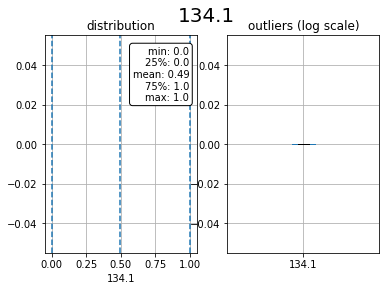

In [ ]:
x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

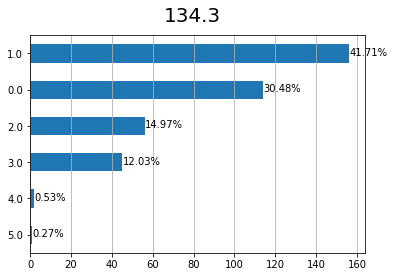

In [ ]:
x = "134.3"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

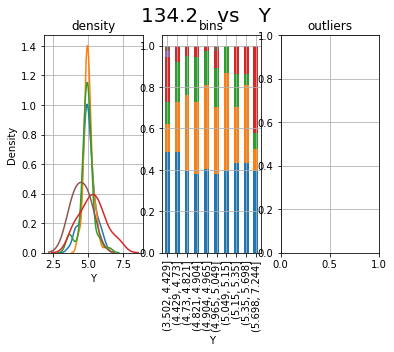

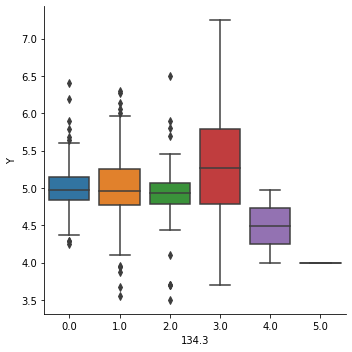

In [ ]:
cat, num = "134.3", "Y"
y="Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20,)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2],)
ax[2].grid(True)
plt.show()

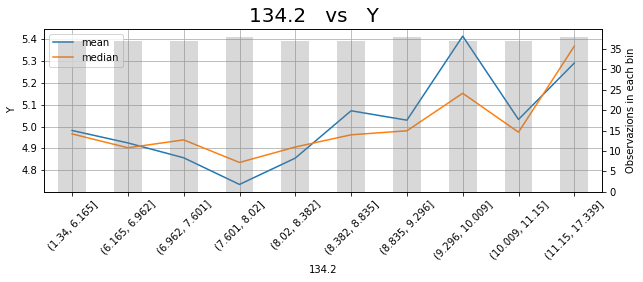

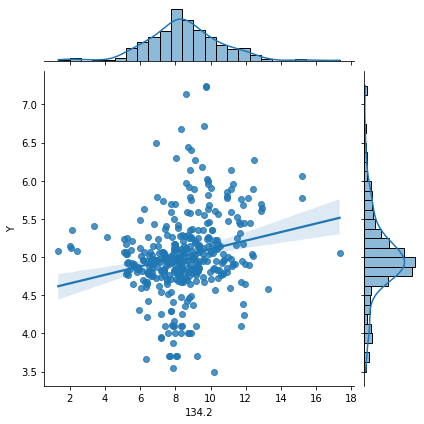

In [ ]:
x, y = "134.2", "Y"
figsize=(10,3)
### bin plot
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

In [ ]:
x, y = "134.2", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.21 Significant (p-value: 0.0)


## Feature Engineering

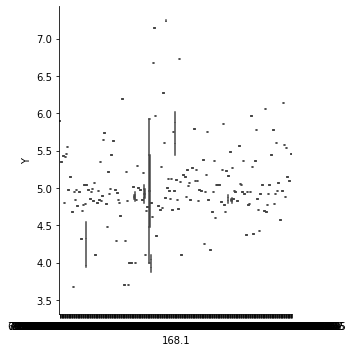

In [ ]:
sns.catplot(x="168.1", y="Y", data=dtf, kind="box")

## Preprocessing

In [ ]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (261, 69) | X_test shape: (113, 69)
y_train mean: 5.02 | y_test mean: 5.01
70 features: ['54', '54.1', '54.2', '54.3', '138', '138.1', '138.2', '138.3', '168', '168.1', '168.2', '177', '177.1', '177.2', '223', '223.1', '260', '260.1', '262', '262.1', '345', '345.1', '370', '370.1', '396', '396.1', '413', '413.1', '477', '477.1', '482', '482.1', '488', '488.1', '496', '496.1', '576', '576.1', '621', '621.1', '650', '650.1', '653', '653.1', '832', '832.1', '955', '955.1', '1034', '1250', '1263', '1322', '1334', '1350', '1516', '1584', '1777', '22', '22.1', '22.2', '22.3', '45', '45.1', '45.2', '45.3', '134', '134.1', '134.2', '134.3']


In [ ]:
from sklearn.preprocessing import StandardScaler
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = preprocessing.StandardScaler().fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", 
                        axis=1).columns, index=dtf_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled[y] = scalerY.fit_transform(
                    dtf_train[y].values.reshape(-1,1))
dtf_scaled.head()

,54,54.1,54.2,54.3,138,138.1,138.2,138.3,168,168.1,...,22.3,45,45.1,45.2,45.3,134,134.1,134.2,134.3,Y
147,-0.188982,-0.456435,1.538081,-0.492772,-0.166009,-0.800943,1.590060,0.267710,-0.062017,0.146780,...,1.354036,-0.188982,-0.246932,2.288165,1.153900,0.0,-0.996176,1.014870,-1.078291,0.440023
2,-0.188982,-0.456435,-0.702556,1.555156,-0.166009,1.248529,-1.214305,-0.460126,-0.062017,-0.311752,...,0.505558,-0.188982,-0.246932,-1.333593,-0.801940,0.0,1.003839,-0.642711,-1.078291,-0.472097
284,-0.188982,-0.456435,0.025301,-0.492772,-0.166009,-0.800943,0.641658,-0.460126,-0.062017,-0.321665,...,1.170146,-0.188982,-0.246932,-0.028076,-0.831769,0.0,1.003839,0.347718,-1.078291,0.151103
145,-0.188982,-0.456435,-0.430800,3.208795,-0.166009,-0.800943,0.637998,1.723382,-0.062017,7.997992,...,1.507256,-0.188982,-0.246932,-0.512380,-0.831769,0.0,1.003839,0.601288,-1.078291,0.327308
74,-0.188982,-0.456435,-0.971052,-0.492772,-0.166009,-0.800943,0.910414,0.267710,-0.062017,0.447830,...,-0.034191,-0.188982,-0.246932,-2.091635,-0.801940,0.0,-0.996176,1.023546,-0.121033,-0.501544


## Feature Selection


Text(0.5, 1.0, 'pearson correlation')

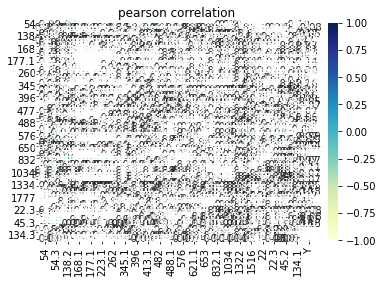

In [ ]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

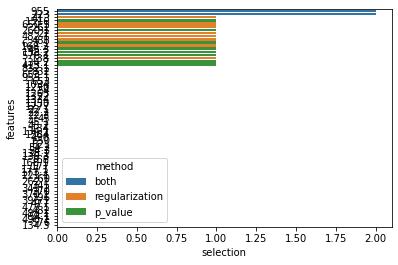

In [ ]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)


sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

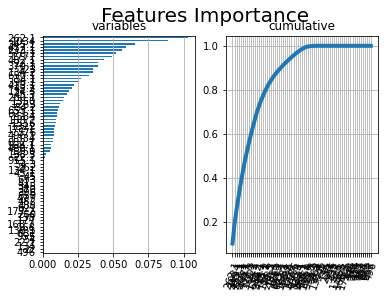

In [ ]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")  
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [ ]:
dtf_importances

,IMPORTANCE,cumsum
VARIABLE,,
262.1,0.103114,0.103114
1034,0.089229,0.192344
345.1,0.065474,0.257818
477.1,0.058781,0.316599
223.1,0.056452,0.373050
...,...,...
488,0.000000,1.000000
621,0.000000,1.000000
650,0.000000,1.000000


In [ ]:
dtf_importances_list = list(dtf_importances.index.values)
dtf_importances_list

In [ ]:
X_names = ['262.1',
 '1034',
 '345.1',
 '477.1',
 '223.1',
 '576.1',
 '1777',
 '482.1',
 '22.3',
 '370.1',
 '223',
 '134.2',
 '650.1',
 '54.1',
 '396.1',
 '413.1',
 '45.2',
 '134.3',
 '45.3',
 '260.1',
 '1350',
 '1263',
 '54.2',
 '653.1',
 '621.1',
 '1584',
 '138.2',
 '1516',
 '1322',
 '177.1',
 '576',
 '496.1',
 '1334',
 '832.1',
 '168.1',
 '488.1',
 '1250',
 '138.3',
 '22.2',
 '955.1']
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

## Model Design


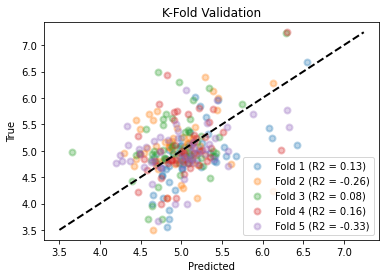

In [ ]:
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [ ]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

In [ ]:
predicted = scalerY.inverse_transform( 
                  predicted.reshape(-1,1) ).reshape(-1)

Evalution

In [ ]:
## Kpi
print("R2:", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("MAE".format(metrics.mean_absolute_error(y_test, predicted)))
print("RMSE:", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): -19.15
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.32
Mean Absolute Error (Σ|y-pred|/n): 2
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 2
Max Error: -4


# New Section

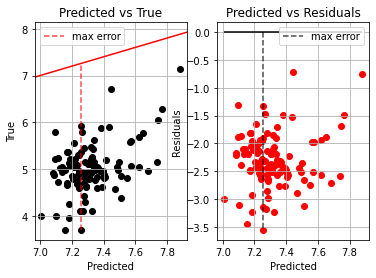

In [ ]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

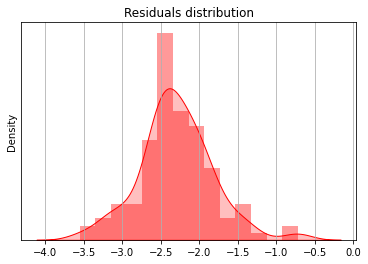

In [ ]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

Explainability

In [ ]:
print("True:", "{:,.0f}".format(y_test[1]), "--> Pred:", "{:,.0f}".format(predicted[1]))

True: 5 --> Pred: 7


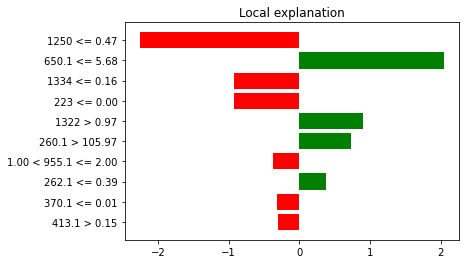

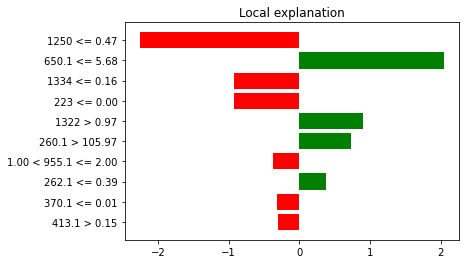

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Y", mode="regression")
explained = explainer.explain_instance(X_test[1], model.predict, num_features=10)
explained.as_pyplot_figure()